### Problem
****
A few weeks ago, I started experiencing random restarts on my home desktop pc.  The issue was hard to pin down, as it didn't seem to occur when I was taxing the system.  Instead, I would experience random restarts while browising the web or doing some light coding in a Jupyter Notebook.  

What I know:
* The system itself is pretty old at this point - it sports an AMD FX 6300 CPU, 16gb of DDR3 ram, and a 3gb Radeon 7950 gpu.  I think I built the system ~7 years ago.
* The CPU, GPU, and memory have all been heavily over clocked in the past, though the CPU is the only component currently overclocked.  It is current running at a healthy, watercooled 4.8ghz. 
* I seem to experience the restarts when I am browsing the web or working on a notebook in a Firefox Browser.
* I do not experience the problem when the system is under hard load.
* On occassion, the machine has restarted after powering up and sitting at the log-on screen for an extended amount of time.

There are a lot of different things that could be going on here, but I decided to try and start at the hardware level.  More specifically, I wanted to see if I could capture what was going on at a hardware level right before the machine restarts.  In order to capture the data, I'm going to use [HwInfo](https://www.hwinfo.com/) to monitor and log as many sensors and readings as I can.

The main UI looks a little like this:
<img src='ui.jpg' />

But, what we're interested in is the logging button down in the bottom right hand corner.

-additional text-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

log = pd.read_excel('4-28-2020_log.xlsx')
log.head()

,Date,Time,Virtual Memory Commited [MB],Virtual Memory Available [MB],Virtual Memory Load [%],Physical Memory Used [MB],Physical Memory Available [MB],Physical Memory Load [%],Page File Usage [%],Core 0 VID [V],...,GPU VRM Voltage In (VIN/+12V) [V].1,GPU VRM Current In (IIN) [A].1,GPU VRM Current Out (IOUT) [A].1,GPU VRM Power Out (POUT) [W].1,GPU VRM Power In (PIN) [W].1,Total DL [MB],Total UP [MB],Current DL rate [KB/s],Current UP rate [KB/s],Total Errors []
0,28.4.2020,09:27:07.558000,4090,14624,21.8,3038,13245,18.6,0,1.325,...,12.063,0.141,1.00,1.594,1.688,2,1,0.135,0.446,0
1,28.4.2020,09:27:10.284000,4087,14628,21.8,3036,13246,18.6,0,1.325,...,12.063,0.141,1.00,1.594,1.688,2,1,0.952,0.435,0
2,28.4.2020,09:27:12.847000,4084,14631,21.8,3036,13247,18.6,0,1.325,...,12.063,0.141,1.00,1.594,1.688,2,1,0.135,0.427,0
3,28.4.2020,09:27:15.179000,3828,14886,20.4,2857,13425,17.5,0,1.325,...,12.063,0.141,1.00,1.594,1.688,2,1,18.386,8.644,0
4,28.4.2020,09:27:17.587000,3886,14828,20.7,2896,13387,17.7,0,1.325,...,12.031,0.938,6.75,10.797,11.266,2,1,0.302,0.534,0


In [9]:
columns = list(log.columns)
columns


['Date',
 'Time',
 'Virtual Memory Commited [MB]',
 'Virtual Memory Available [MB]',
 'Virtual Memory Load [%]',
 'Physical Memory Used [MB]',
 'Physical Memory Available [MB]',
 'Physical Memory Load [%]',
 'Page File Usage [%]',
 'Core 0 VID [V]',
 'Core 1 VID [V]',
 'Core 2 VID [V]',
 'Core 3 VID [V]',
 'Core 4 VID [V]',
 'Core 5 VID [V]',
 'NB VID [V]',
 'Core 0 Clock [MHz]',
 'Core 1 Clock [MHz]',
 'Core 2 Clock [MHz]',
 'Core 3 Clock [MHz]',
 'Core 4 Clock [MHz]',
 'Core 5 Clock [MHz]',
 'Bus Clock [MHz]',
 'NB Clock [MHz]',
 'HT Clock [MHz]',
 'Core 0 Effective Clock [MHz]',
 'Core 1 Effective Clock [MHz]',
 'Core 2 Effective Clock [MHz]',
 'Core 3 Effective Clock [MHz]',
 'Core 4 Effective Clock [MHz]',
 'Core 5 Effective Clock [MHz]',
 'Average Effective Clock [MHz]',
 'Core 0 Usage [%]',
 'Core 1 Usage [%]',
 'Core 2 Usage [%]',
 'Core 3 Usage [%]',
 'Core 4 Usage [%]',
 'Core 5 Usage [%]',
 'Max CPU/Thread Usage [%]',
 'Total CPU Usage [%]',
 'Core 0 Ratio [x]',
 'Core 1 Rat

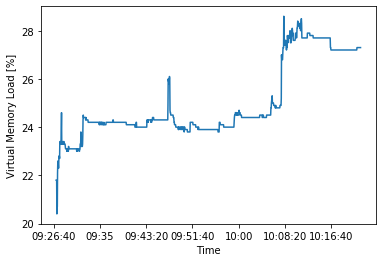

In [4]:
# memory load over time 
sns.lineplot(x = 'Time', y = 'Virtual Memory Load [%]', data = log)
plt.show()

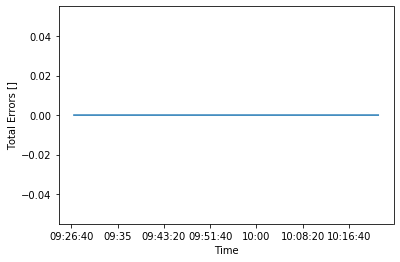

In [5]:
sns.lineplot(x = 'Time', y = 'Total Errors []', data = log)
plt.show()

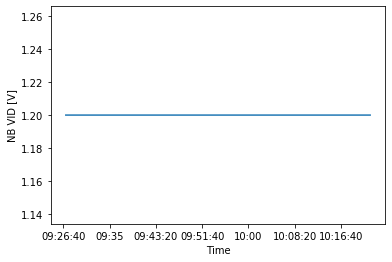

In [11]:
sns.lineplot(x = 'Time', y = 'NB VID [V]', data = log)
plt.show()

In [ ]:
 sns.lineplot(x = 'Time', y = 'NB VID [V]', data = log)
   
    'Core 0 VID [V]',
 'Core 1 VID [V]',
 'Core 2 VID [V]',
 'Core 3 VID [V]',
 'Core 4 VID [V]',
 'Core 5 VID [V]',

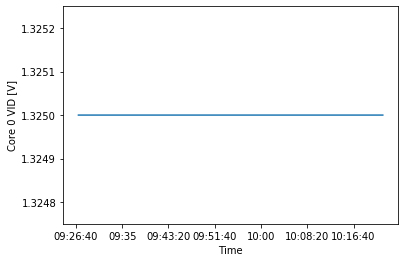

In [28]:
#ns.lineplot(x = 'Time', y = 'NB VID [V]', data = log)
g = sns.lineplot(x = 'Time', y  = 'Core 0 VID [V]', data = log)
g.set_ylim(bottom = 1.32475,
           top = 1.32525 )
plt.show()